In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


#----читаем json-----------
df_main = pd.read_json("initial_data.json")
print(df_main)

      id клиента  id счета Дата рождения  Пол Клиент подключил услугу  \
0           1236      3000    1976-11-02  0.0     2020-09-22 19:36:56   
1           1314      3001    1979-10-21  1.0     2020-04-29 11:13:18   
2           1248      3002    1964-11-15  1.0     2020-09-30 14:48:46   
3           2053      3003    1979-09-12  0.0     2020-03-03 17:10:30   
4           2016      3004    1973-03-23  0.0     2019-08-19 13:24:27   
...          ...       ...           ...  ...                     ...   
1360        1718      4200    1971-08-06  1.0     2020-12-25 16:30:12   
1361        1687      4201    1977-08-28  0.0     2020-10-26 14:30:20   
1362        1296      4202    1985-03-07  1.0     2020-12-15 13:06:57   
1363        1372      4203    1981-10-26  0.0     2020-09-10 16:22:13   
1364        1004      4204    1989-07-22  1.0     2020-12-29 13:31:56   

     Клиент отключил услугу  
0       2021-09-10 19:24:19  
1                       NaT  
2       2021-04-30 10:26:50  
3  

In [39]:
#переводим все даты в формат date-------------------
df_main['Клиент подключил услугу'] = pd.to_datetime(df_main['Клиент подключил услугу'], format='%Y-%m-%d %H:%M:%S')
df_main['Клиент отключил услугу'] = pd.to_datetime(df_main['Клиент отключил услугу'], format='%Y-%m-%d %H:%M:%S')
print(df_main.info())
#Сортируем-------------------
df_main = df_main.sort_values(by=['Клиент подключил услугу'], ascending = False)

#Вычислим возраст клиента на момент подключения услуги-------------------
df_main['Дата рождения'] = pd.to_datetime(df_main['Дата рождения'], format='%Y-%m-%d')
df_main['Возраст'] = round(((df_main['Клиент подключил услугу'] - df_main['Дата рождения']).dt.days / 365), 0)
df_main

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 3 to 1359
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id клиента               535 non-null    int64         
 1   id счета                 535 non-null    int64         
 2   Дата рождения            535 non-null    object        
 3   Пол                      534 non-null    float64       
 4   Клиент подключил услугу  535 non-null    datetime64[ns]
 5   Клиент отключил услугу   535 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 29.3+ KB
None


,id клиента,id счета,Дата рождения,Пол,Клиент подключил услугу,Клиент отключил услугу,Возраст
1166,1245,4027,1975-10-08,0.0,2020-12-24 12:06:08,2020-12-25 16:32:53,45.0
64,1060,3059,1964-03-07,0.0,2020-12-23 17:43:13,2020-12-23 18:30:12,57.0
534,1801,3474,1947-09-29,0.0,2020-12-23 16:48:18,2020-12-28 18:16:37,73.0
966,1026,3847,1949-09-26,0.0,2020-12-23 13:46:40,2020-12-25 04:21:00,71.0
724,1616,3650,1983-05-04,0.0,2020-12-22 11:34:19,2020-12-28 13:28:55,38.0
...,...,...,...,...,...,...,...
1132,2078,3995,1955-11-16,1.0,2019-04-09 22:52:50,2019-04-09 23:19:14,63.0
928,1716,3812,1964-08-27,0.0,2019-04-02 17:46:02,2019-05-18 10:41:42,55.0
924,1716,3808,1964-08-27,0.0,2019-04-01 20:03:41,2019-05-23 13:25:55,55.0
940,1570,3824,1993-05-10,0.0,2019-03-25 17:36:31,2019-06-05 10:15:30,26.0


In [33]:
#-----Обрезаем даты подключения и откючения до формата месяц-год для удобства последующей группировки
df_main_p = df_main.copy()
df_main_p['Клиент подключил услугу'] = df_main_p['Клиент подключил услугу'].dt.to_period("M")
df_main_p['Клиент отключил услугу'] = df_main_p['Клиент отключил услугу'].dt.to_period("M")
df_main_p

,id клиента,id счета,Дата рождения,Пол,Клиент подключил услугу,Клиент отключил услугу,Возраст
449,1041,3396,1991-07-18,1.0,2020-12,2020-12,29.0
254,1023,3232,1977-03-28,1.0,2020-12,NaT,44.0
608,1000,3544,1990-05-16,1.0,2020-12,2021-07,31.0
1211,1981,4066,1954-09-11,0.0,2020-12,2021-04,66.0
600,1001,3536,1934-08-09,0.0,2020-12,2021-03,86.0
...,...,...,...,...,...,...,...
928,1716,3812,1964-08-27,0.0,2019-04,2019-05,55.0
924,1716,3808,1964-08-27,0.0,2019-04,2019-05,55.0
940,1570,3824,1993-05-10,0.0,2019-03,2019-06,26.0
155,1757,3143,1959-06-30,1.0,2019-03,2022-02,60.0


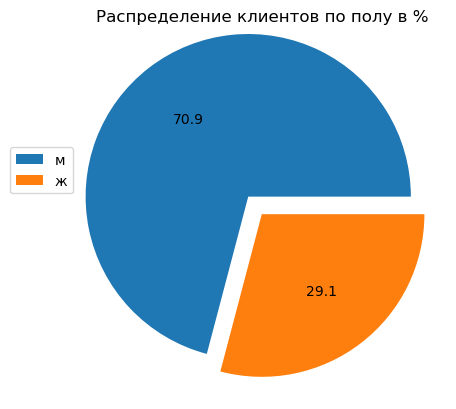

In [34]:
#-----Создаем фрейм с портретом пользователя - пол и возраст
df_portrait = df_main_p.drop(columns = ['Клиент подключил услугу', 'Клиент отключил услугу', 'Дата рождения', 'id счета'], axis=1)
df_portrait_sex = df_portrait.groupby(['Пол']).agg({'id клиента':['count']})
df_portrait_sex['count_perc'] = round(df_portrait_sex['id клиента']['count']/df_portrait_sex['id клиента']['count'].sum()*100,1)

plt.title('Распределение клиентов по полу в %')
plt.pie(
    df_portrait_sex['count_perc'], autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for i in range(len(df_portrait_sex) - 1)])
plt.legend(
    bbox_to_anchor = (-0.2, 0.45, 0.25, 0.25),
    loc = 'best', labels = ['м','ж'])


Text(0, 0.5, 'Количество')

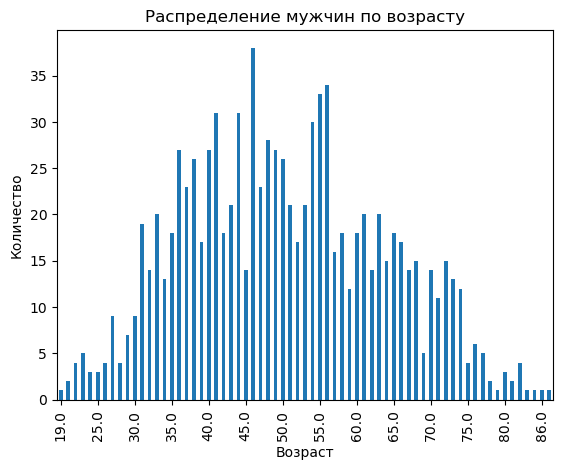

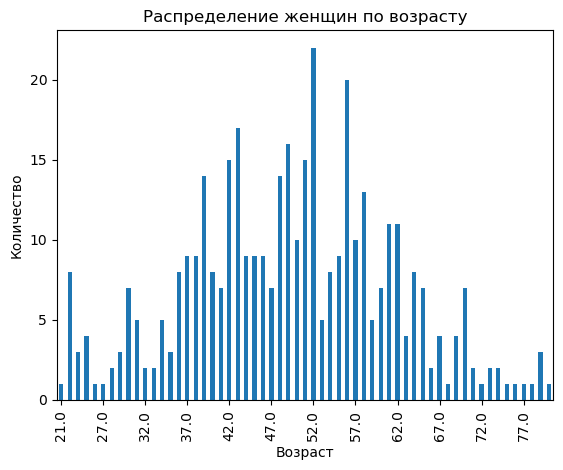

In [35]:
import numpy as np
df_portrait_sex_m = df_portrait[(df_portrait['Пол']) == 0]
df_portrait_sex_m = df_portrait_sex_m.groupby('Возраст').agg({'id клиента':['count']})



df_portrait_sex_w = df_portrait[(df_portrait['Пол']) == 1]
df_portrait_sex_w = df_portrait_sex_w.groupby('Возраст').agg({'id клиента':['count']})


df_portrait_sex_m.plot.bar(legend = False)
plt.xticks(np.arange(0, len(df_portrait_sex_m.index.to_numpy())+1, 5))
plt.title("Распределение мужчин по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Количество")

df_portrait_sex_w.plot.bar(legend = False)
plt.xticks(np.arange(0, len(df_portrait_sex_w.index.to_numpy())+1, 5))
plt.title("Распределение женщин по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Количество")

id клиента           saldo
          count_on count_off      
2019-03          2       1.0   1.0
2019-04         10       3.0   7.0
2019-05          4       5.0  -1.0
2019-06         16       7.0   9.0
2019-07          6       0.0   6.0
2019-08         19       4.0  15.0
2019-09         28       6.0  22.0
2019-10         17      16.0   1.0
2019-11         16      20.0  -4.0
2019-12         29      27.0   2.0
2020-01         31      13.0  18.0
2020-02         41      30.0  11.0
2020-03         29      36.0  -7.0
2020-04         13      23.0 -10.0
2020-05         29      20.0   9.0
2020-06         41      28.0  13.0
2020-07         33      40.0  -7.0
2020-08         27      34.0  -7.0
2020-09         47      34.0  13.0
2020-10         59      63.0  -4.0
2020-11         26      62.0 -36.0
2020-12         13      64.0 -51.0

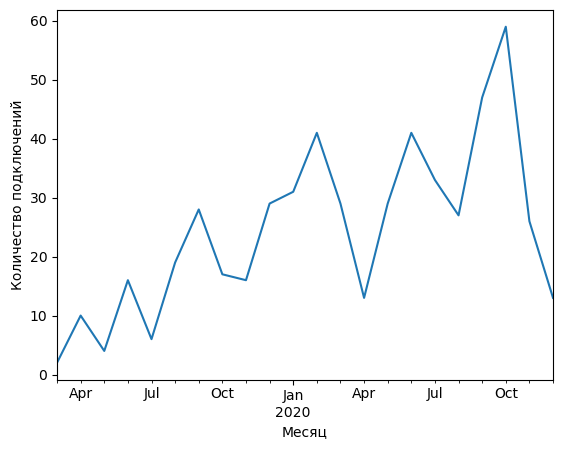

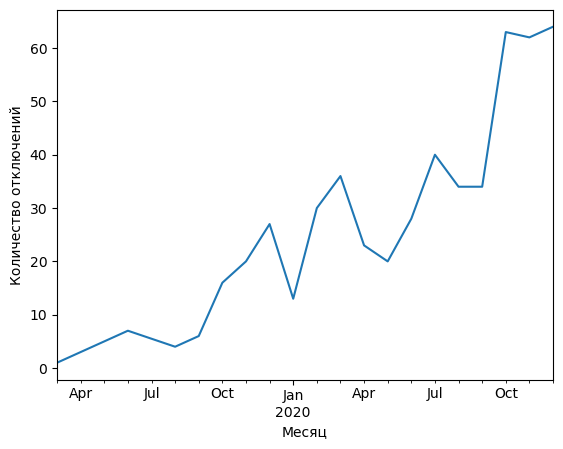

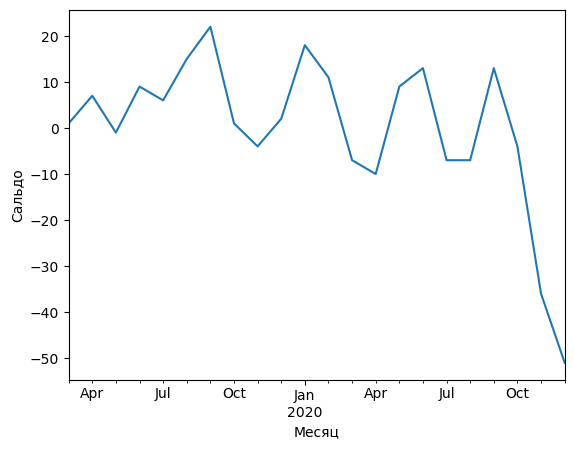

In [167]:
#-----Создаем фрейм с данными пользователей, отключивших услугу в 2021 и 2022 году, пусть будет,
#----Однако задача сделать прогноз на 2021 год по данным 2019 и 2020 года, поэтому известные
#--значения на 2021 год обрезаем
df_2021_sw_off = df_main_p[(df_main_p['Клиент отключил услугу'])>'2020-12-30']

#-----Создаем основной фрейм с данными пользователей до 2021 года
df_main_p = df_main_p[(df_main_p['Клиент отключил услугу'])<='2020-12-30']

#---Создаем фрейм, где считаем клиетов подключивших услугу по месяцам
df_switch_on = df_main_p.groupby(['Клиент подключил услугу']).agg({'id клиента': ['count']}, inplace=False)
df_switch_on.rename(columns={'count':'count_on'}, inplace=True)


#---Создаем фрейм, где считаем клиетов отключивших услугу по месяцам
df_switch_off = df_main_p.groupby(['Клиент отключил услугу']).agg({'id клиента':['count']}, inplace=False)
df_switch_off.rename(columns={'count':'count_off'}, inplace=True)

#--Соединяем два предыдущих фрейма
joined_df = pd.concat([df_switch_on, df_switch_off],axis=1)

#--Если в фрейме есьт NaN, на всякий случай убираем
joined_df = joined_df.fillna(0)
#---Считаем сальдо
joined_df['saldo'] = joined_df['id клиента']['count_on'] - joined_df['id клиента']['count_off']

df_switch_on.plot(legend = False)
plt.xlabel("Месяц")
plt.ylabel("Количество подключений")

df_switch_off.plot(legend = False)
plt.xlabel("Месяц")
plt.ylabel("Количество отключений")

joined_df.plot(y='saldo',legend = False)
plt.xlabel("Месяц")
plt.ylabel("Сальдо")
joined_df

err=  0.3069608637943814


(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Месяц-Год', ylabel='Количество'>)

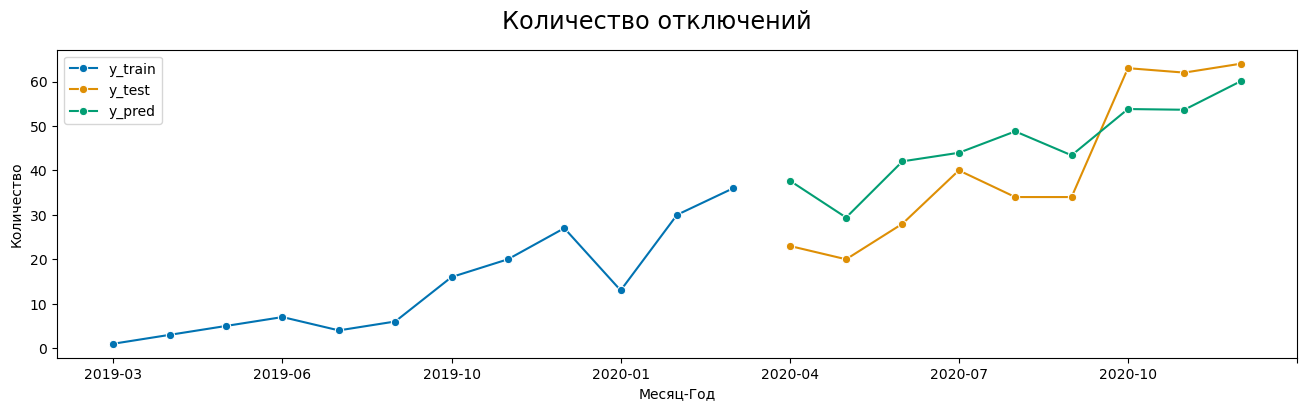

In [103]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.linear_model import LinearRegression
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.bats import BATS

#Валидация модели для количества отключений

y_train, y_test = temporal_train_test_split(df_switch_off, test_size=9)

fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster_off = AutoARIMA(sp=2, suppress_warnings=True)



forecaster_off.fit(y_train)
y_sw_off_pred = forecaster_off.predict(fh)

err = mean_absolute_percentage_error(y_test, y_sw_off_pred)
print('err= ',err)


plot_series(y_train,y_test,y_sw_off_pred,labels=["y_train",'y_test', "y_pred"],x_label='Месяц-Год', y_label='Количество',title='Количество отключений')



err=  0.38527835106337005


(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Месяц-Год', ylabel='Количество'>)

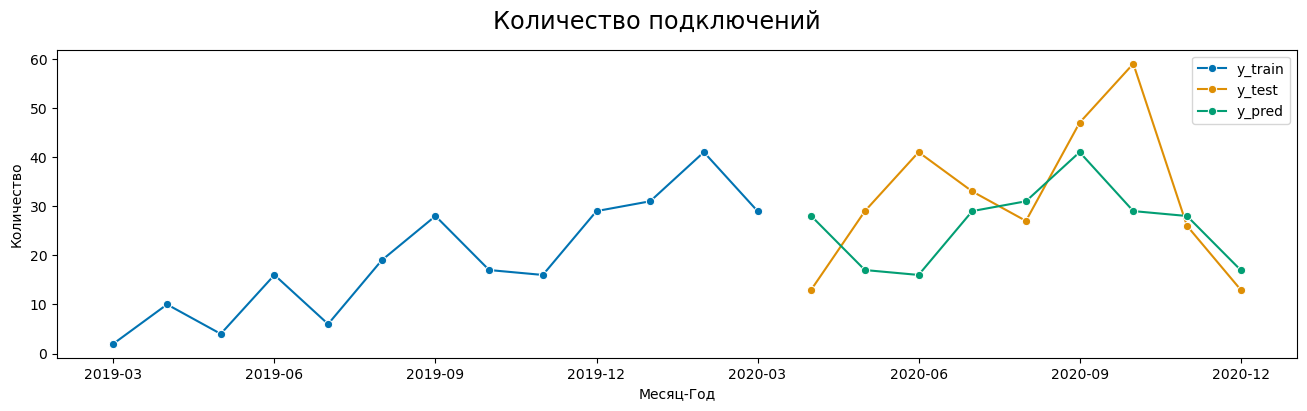

In [166]:
#Валидация модели для количества подключений

y_train, y_test = temporal_train_test_split(df_switch_on, test_size=9)

fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster_on = NaiveForecaster(strategy="last", sp=7)

forecaster_on.fit(y_train)
y_sw_on_pred = forecaster_on.predict(fh)

err = mean_absolute_percentage_error(y_test, y_sw_on_pred)
print('err= ',err)


plot_series(y_train,y_test,y_sw_on_pred,labels=["y_train",'y_test', "y_pred"],x_label='Месяц-Год', y_label='Количество',title='Количество подключений')



err=  1.8535932132488757


(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Месяц-Год', ylabel='Количество'>)

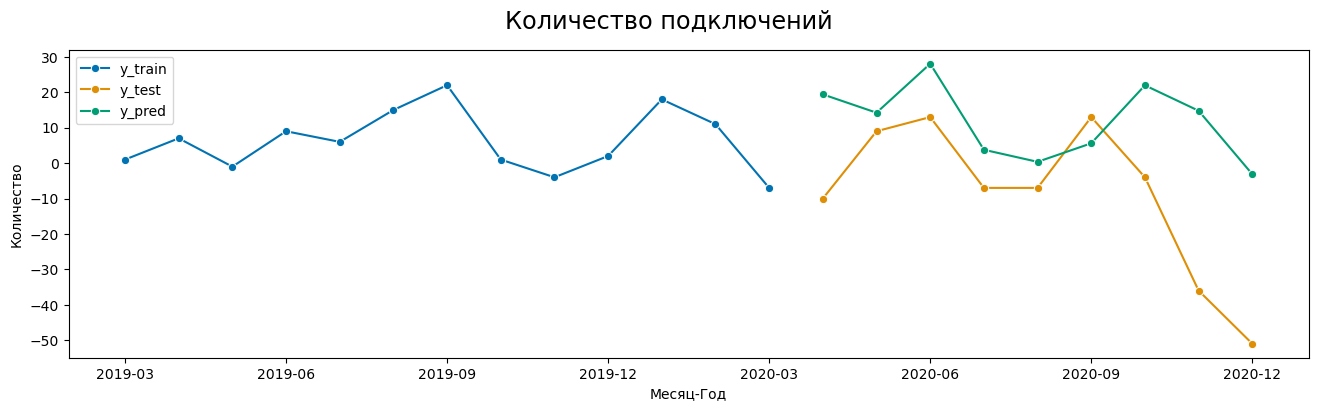

In [261]:
#Валидация модели для сальдо

df_saldo = joined_df.drop('id клиента', axis = 1)


y_train, y_test = temporal_train_test_split(df_saldo, test_size=9)

fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster_saldo = ARIMA(
    order=(1, 0, 0), seasonal_order=(0, 1, 0, 9), suppress_warnings=True
)

forecaster_saldo.fit(y_train)
y_saldo_pred = forecaster_saldo.predict(fh)

err = mean_absolute_percentage_error(y_test, y_saldo_pred)
print('err= ',err)


plot_series(y_train,y_test,y_saldo_pred,labels=["y_train",'y_test', "y_pred"],x_label='Месяц-Год', y_label='Количество',title='Количество подключений')



(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Месяц-Год', ylabel='Количество'>)

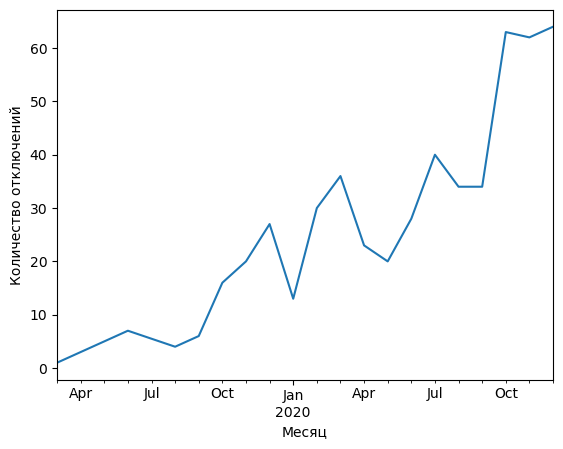

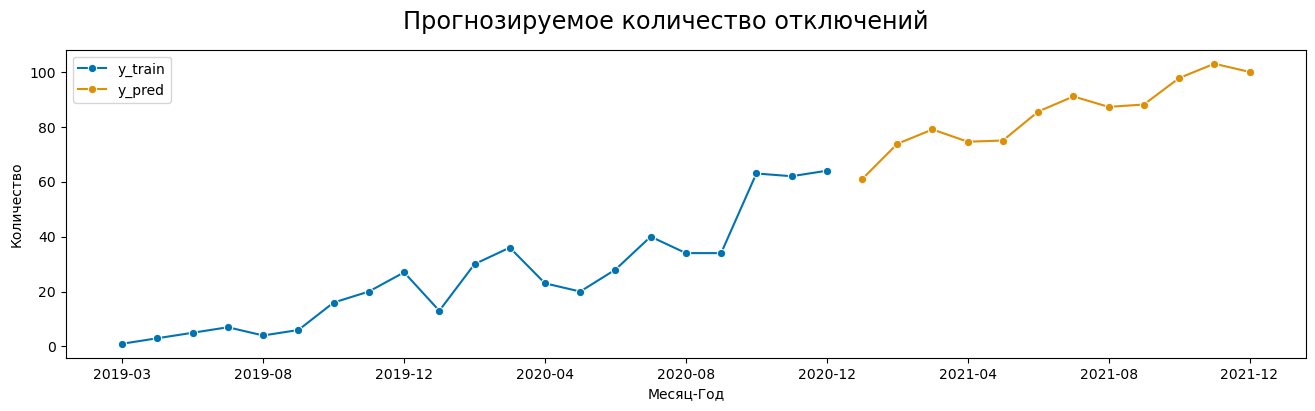

In [102]:

fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2021-01-01", periods=12, freq="M")), is_relative=False
)

forecaster_off = AutoARIMA(sp=2, suppress_warnings=True)


forecaster_off.fit(df_switch_off)
y_sw_off_pred = forecaster_off.predict(fh)


df_switch_off.plot(legend = False)
plt.xlabel("Месяц")
plt.ylabel("Количество отключений")

plot_series(df_switch_off,y_sw_off_pred,labels=["y_train", "y_pred"],x_label='Месяц-Год', y_label='Количество',title='Прогнозируемое количество отключений')
                       
                                  

(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Месяц-Год', ylabel='Количество'>)

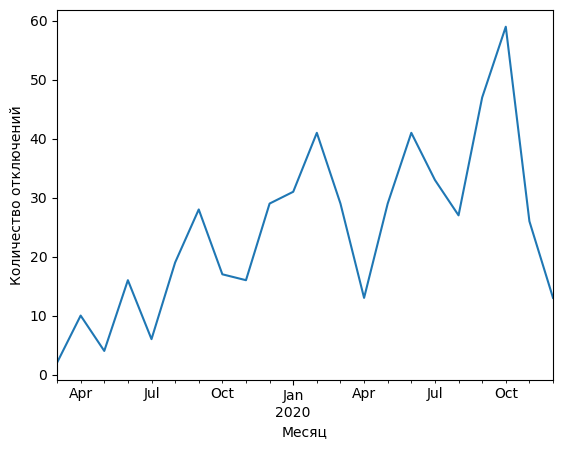

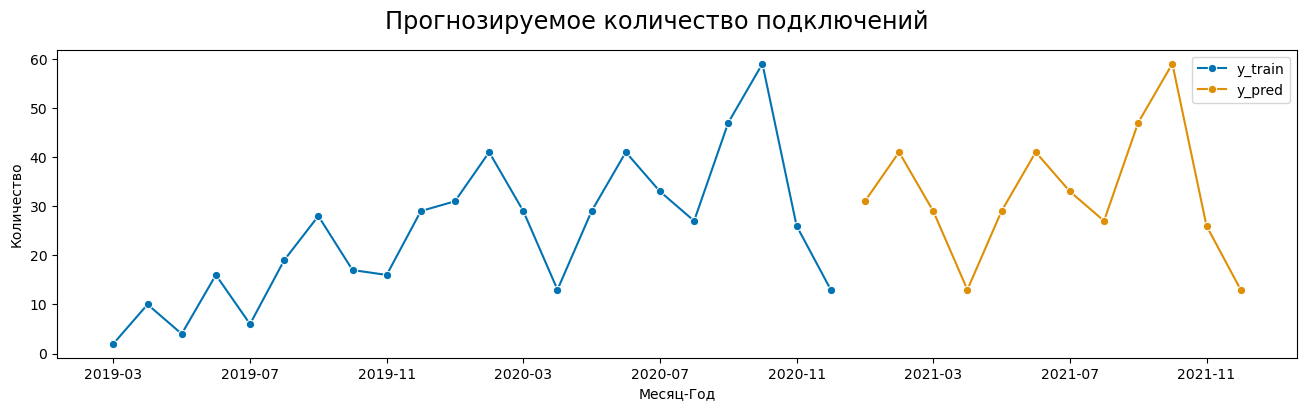

In [162]:


fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2021-01-01", periods=12, freq="M")), is_relative=False
)

forecaster_on = NaiveForecaster(strategy="last", sp=12)

forecaster_on.fit(df_switch_on)

y_sw_on_pred = forecaster_on.predict(fh)


df_switch_on.plot(legend = False)
plt.xlabel("Месяц")
plt.ylabel("Количество отключений")

plot_series(df_switch_on, y_sw_on_pred,labels=["y_train", "y_pred"],x_label='Месяц-Год', y_label='Количество',title='Прогнозируемое количество подключений')



(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Месяц-Год', ylabel='Сальдо'>)

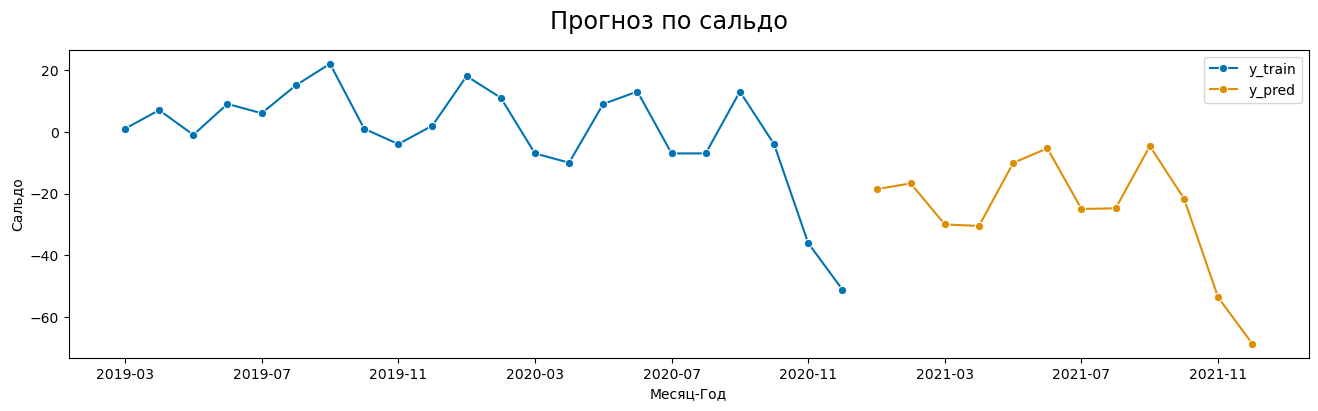

In [262]:


fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2021-01-01", periods=12, freq="M")), is_relative=False
)

forecaster_saldo =  ARIMA(
    order=(1, 0, 0), seasonal_order=(0, 1, 0, 12), suppress_warnings=True
)
forecaster_saldo.fit(df_saldo)
y_saldo_pred = forecaster_saldo.predict(fh)


plot_series(df_saldo,y_saldo_pred,labels=["y_train", "y_pred"],x_label='Месяц-Год', y_label='Сальдо',title='Прогноз по сальдо')



In [ ]:
#ВЫВОДЫ
# При текущих параметрах количество отписок в 2021 году будет плавно расти,количество подписок в среднем будет также расти,
# но может обвалиться к концу года
# Из-за обвала подписок в 2020 году, сальдо будет ниже 0 и может также обвалиться к концу года
